In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [49]:
df = pd.read_excel('Volcano.xlsx')
N = df['Volcano Number'].size

In [50]:
df.head(5)

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211001,Larderello,Italy,Explosion crater(s),Eruption Observed,1282 CE,Mediterranean and Western Asia,Italy,43.250,10.87,500,No Data (checked),Subduction zone / Continental crust (>25 km)


In [51]:
df.columns

Index(['Volcano Number', 'Volcano Name', 'Country', 'Primary Volcano Type',
       'Activity Evidence', 'Last Known Eruption', 'Region', 'Subregion',
       'Latitude', 'Longitude', 'Elevation (m)', 'Dominant Rock Type',
       'Tectonic Setting'],
      dtype='object')

### Elevation

In [52]:
elevations = df['Elevation (m)']

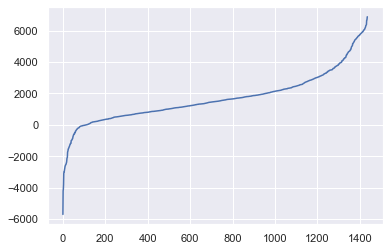

In [53]:
plt.plot(range(len(elevations)), np.sort(elevations))

[]

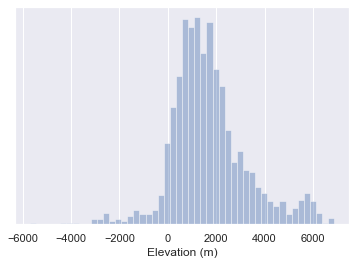

In [54]:
sns.set()
ax = sns.distplot(elevations, bins = 50, kde = False)
ax.set_yticks([])

In [55]:
height_mean = np.mean(elevations)
height_median = np.median(elevations)
height_max = np.max(elevations)
heigth_min = np.min(elevations)

### Erruptions

In [56]:
last_err = df['Last Known Eruption']
last_err_clean = last_err[last_err != 'Unknown']
old_perc = len(last_err_clean)/len(last_err) * 100
last_err_clean = [x.split(' ') for x in last_err_clean]
oldness = np.array([2018+int(x[0]) if x[1] == 'BCE' else 2018-int(x[0]) for x in last_err_clean])
oldest = np.max(oldness)
old_mean = np.mean(oldness)
old_median = np.median(oldness)

In [57]:
err_ev = df['Activity Evidence']
err_poss_activity_info = ', '.join(err_ev.unique())

### Position

In [58]:
position_info = df[['Country', 'Region', 'Subregion', 'Latitude', 'Longitude']]
num_countries = position_info['Country'].unique().shape[0]
num_regions = position_info['Region'].unique().shape[0]
num_subregions = position_info['Subregion'].unique().shape[0]

### Volcano properties

In [59]:
prop = df[['Primary Volcano Type', 'Dominant Rock Type', 'Tectonic Setting']]
num_vol_type = prop['Primary Volcano Type'].unique().shape[0]
num_rock_type = prop['Dominant Rock Type'].unique().shape[0]
num_tec_type = prop[ 'Tectonic Setting'].unique().shape[0]

In [60]:
prop['Primary Volcano Type'].unique()

array(['Maar(s)', 'Lava dome(s)', 'Pyroclastic cone(s)',
       'Explosion crater(s)', 'Caldera', 'Stratovolcano', 'Complex',
       'Submarine', 'Stratovolcano(es)', 'Shield', 'Shield(s)',
       'Lava dome', 'Lava cone(s)', 'Volcanic field', 'Volcanic field(s)',
       'Fissure vent(s)', 'Fissure vent', 'Caldera(s)',
       'Pyroclastic cone', 'Tuff cone(s)', 'Tuff cone',
       'Pyroclastic shield', 'Submarine(es)', 'Maar', 'Compound',
       'Lava cone', 'Stratovolcano?', 'Unknown', 'Crater rows',
       'Complex(es)', 'Cone(s)', 'Tuff ring(s)', 'Subglacial'],
      dtype=object)

In [61]:
rockTypes = prop['Dominant Rock Type'].dropna().unique()

In [62]:
rockTypes

array(['Foidite', 'Basalt / Picro-Basalt',
       'Trachybasalt / Tephrite Basanite', 'No Data (checked)',
       'Trachyte / Trachydacite', 'Phono-tephrite /  Tephri-phonolite',
       'Phonolite', 'Trachyandesite / Basaltic Trachyandesite',
       'Andesite / Basaltic Andesite', 'Rhyolite', 'Dacite'], dtype=object)

In [63]:
x = []
y = []
for i in rockTypes:
    n = len(prop[prop['Dominant Rock Type'] == i])
    x.append(i)
    y.append(n)

In [64]:
x[8]

'Andesite / Basaltic Andesite'

Text(0.5, 0, 'rock types')

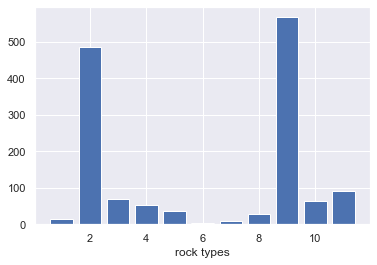

In [65]:
ax = plt.bar(1+np.arange(11), y)
plt.xlabel('rock types')

In [66]:
prop['Tectonic Setting'].unique()

array(['Rift zone / Continental crust (>25 km)',
       'Intraplate / Continental crust (>25 km)',
       'Subduction zone / Continental crust (>25 km)', nan,
       'Rift zone / Oceanic crust (< 15 km)',
       'Rift zone / Intermediate crust (15-25 km)',
       'Intraplate / Oceanic crust (< 15 km)',
       'Subduction zone / Oceanic crust (< 15 km)',
       'Subduction zone / Crustal thickness unknown',
       'Subduction zone / Intermediate crust (15-25 km)', 'Unknown',
       'Intraplate / Intermediate crust (15-25 km)'], dtype=object)

In [67]:
rz= 0
intr = 0
sz = 0
for i in prop['Tectonic Setting'].dropna():
    if i[0] == 'R':
        rz+=1
    elif i[0] == 'S':
        sz+=1
    elif i[0] == 'I':
        intr+=1
print('r: ' + str(rz) + ', i: ' + str(intr) + ' s: ' + str(sz))

r: 240, i: 182 s: 1008


<BarContainer object of 3 artists>

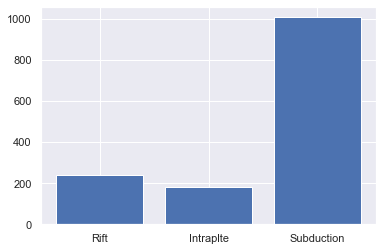

In [68]:
plt.bar(['Rift', 'Intraplte', 'Subduction'], [rz, intr, sz])

In [69]:
temp = prop[prop['Primary Volcano Type'] != 'Unkown']
temp = temp[temp['Dominant Rock Type'] != 'No Data (checked)']
temp = temp[temp['Tectonic Setting'] != 'Unknown']
temp = temp.dropna()

In [70]:
types = temp['Primary Volcano Type'].unique()

In [71]:
temp['Primary Volcano Type']

0                   Maar(s)
1              Lava dome(s)
2       Pyroclastic cone(s)
3       Pyroclastic cone(s)
5                   Caldera
               ...         
1430          Stratovolcano
1431          Stratovolcano
1432          Stratovolcano
1433              Submarine
1434                 Shield
Name: Primary Volcano Type, Length: 1367, dtype: object

### Cell for printing findings

In [72]:
print("""There are {} volcanoes that are referenced in the dataset."""
     .format(N)
    )

print(
"""   The oldest erruption happened {} years ago({}),
the mean difference in year with today is {}, the median {}.
This information is available for {}% of the volcanoes.
There also is activity information.
The possible values are {}."""
    .format(oldest, str(oldest-2020)+' BCE', int(old_mean), int(old_median), int(old_perc), err_poss_activity_info)
)

print(
"""   Height is given with respect to sea level.
The mean heigth is {}, while the median height is {}.
The maximum heigth is {} while the minimum is {}."""
    .format(int(height_mean), int(height_median), int(height_max), int(heigth_min)))

print(
"""   The volcanoes are shattered accross {} countries ({} regions and {} subregions)."""
    .format(num_countries, num_regions, num_subregions)
)

print(
"""   The volcanoes have 3 additional properties:
'Primary Volcano Type' ({} types), 'Dominant Rock Type' ({} types) and 'Tectonic Setting' ({} types).

""".format(num_vol_type, num_rock_type, num_tec_type))

There are 1436 volcanoes that are referenced in the dataset.
   The oldest erruption happened 12468 years ago(10448 BCE),
the mean difference in year with today is 1250, the median 112.
This information is available for 60% of the volcanoes.
There also is activity information.
The possible values are Eruption Dated, Evidence Credible, Eruption Observed, Evidence Uncertain, Unrest / Holocene.
   Height is given with respect to sea level.
The mean heigth is 1688, while the median height is 1484.
The maximum heigth is 6879 while the minimum is -5700.
   The volcanoes are shattered accross 95 countries (19 regions and 107 subregions).
   The volcanoes have 3 additional properties:
'Primary Volcano Type' (33 types), 'Dominant Rock Type' (12 types) and 'Tectonic Setting' (12 types).




## cleaninig column per column

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('Volcano.xlsx')

In [2]:
df.count()
df = df.fillna('Unknown') ## replace na by unknown

In [3]:
df = df.replace('Unknown', 'unknown')

In [4]:
for i in df.columns:
    print(i)

Volcano Number
Volcano Name
Country
Primary Volcano Type
Activity Evidence
Last Known Eruption
Region
Subregion
Latitude
Longitude
Elevation (m)
Dominant Rock Type
Tectonic Setting


### Country
#### modifications:
    replaced all countries with an array with all the countries that the volcano belongs to

In [5]:
countries = df['Country'].unique()
print(countries)

['Germany' 'France' 'Spain' 'Italy' 'Greece' 'Turkey' 'Russia' 'Georgia'
 'Armenia' 'Armenia-Azerbaijan' 'Yemen' 'Eritrea' 'Ethiopia'
 'Ethiopia-Eritrea' 'Ethiopia-Djibouti' 'Ethiopia-Eritrea-Djibouti'
 'Eritrea-Djibouti' 'Djibouti' 'Ethiopia-Kenya' 'Kenya' 'Tanzania'
 'Uganda' 'DR Congo' 'DR Congo-Rwanda' 'Uganda-Rwanda' 'Equatorial Guinea'
 'Cameroon' 'Niger' 'Mali' 'Algeria' 'Chad' 'Sudan' 'Syria'
 'Syria-Jordan-Saudi Arabia' 'Saudi Arabia' 'Iran' 'Comoros' 'Madagascar'
 'Australia' 'South Africa' 'New Zealand' 'Undersea Features' 'Tonga'
 'United States' 'Samoa' 'Fiji' 'Papua New Guinea' 'Solomon Islands'
 'Vanuatu' 'India' 'Indonesia' 'Philippines' 'China' 'Vietnam'
 'Burma (Myanmar)' 'Taiwan' 'Japan' 'Japan - administered by Russia'
 'Mongolia' 'China-North Korea' 'North Korea-South Korea' 'South Korea'
 'Canada' 'Mexico' 'Mexico-Guatemala' 'Guatemala' 'Guatemala-El Salvador'
 'El Salvador-Guatemala' 'El Salvador' 'Honduras' 'Nicaragua' 'Costa Rica'
 'Panama' 'Colombia' 'Colombia

countries are all defined as string but some of them are a combination of two countries.

In [6]:
def map_countries(countries):
    res = []
    for i,c in enumerate(countries):
        res.append(c.split('-'))
    return res

In [7]:
df['Country'] = map_countries(df['Country'])

### Primary Volcano Type
#### modifications:
    removed the (s), (es) and ? from the types

In [8]:
types = df['Primary Volcano Type'].unique()
print(types)

['Maar(s)' 'Lava dome(s)' 'Pyroclastic cone(s)' 'Explosion crater(s)'
 'Caldera' 'Stratovolcano' 'Complex' 'Submarine' 'Stratovolcano(es)'
 'Shield' 'Shield(s)' 'Lava dome' 'Lava cone(s)' 'Volcanic field'
 'Volcanic field(s)' 'Fissure vent(s)' 'Fissure vent' 'Caldera(s)'
 'Pyroclastic cone' 'Tuff cone(s)' 'Tuff cone' 'Pyroclastic shield'
 'Submarine(es)' 'Maar' 'Compound' 'Lava cone' 'Stratovolcano?' 'unknown'
 'Crater rows' 'Complex(es)' 'Cone(s)' 'Tuff ring(s)' 'Subglacial']


there are unknown volcano types

In [9]:
def changeTypes(types):
    res = []
    for t in types:
            res.append(t
                       .replace('(s)', '')
                       .replace('(es)', '')
                       .replace('?', '')
                      )
    return res

In [10]:
df['Primary Volcano Type'] = changeTypes(df['Primary Volcano Type'])

In [11]:
df['Primary Volcano Type'].unique()

array(['Maar', 'Lava dome', 'Pyroclastic cone', 'Explosion crater',
       'Caldera', 'Stratovolcano', 'Complex', 'Submarine', 'Shield',
       'Lava cone', 'Volcanic field', 'Fissure vent', 'Tuff cone',
       'Pyroclastic shield', 'Compound', 'unknown', 'Crater rows', 'Cone',
       'Tuff ring', 'Subglacial'], dtype=object)

### Activity Evidence

In [12]:
act_ev = df['Activity Evidence']

In [13]:
act_ev.unique()

array(['Eruption Dated', 'Evidence Credible', 'Eruption Observed',
       'Evidence Uncertain', 'Unrest / Holocene'], dtype=object)

### Last Known Erruption
#### modifications:
replaced every string of the eruption times by the time from 2018 (time of the creation of the document) and the last known eruption.

In [14]:
last_er = df['Last Known Eruption']

In [15]:
splitted = np.array([x.split(' ') for x in last_er])
def age(elem):
    if len(elem) == 2:
        if elem[1] == 'BCE':
            return 2018 + int(elem[0]) 
        else:
            return 2018 - int(elem[0])
    else:
        return elem[0]

In [16]:
res = map(age, splitted)
df['Last Known Eruption'] = list(res)

### Region

In [17]:
df['Region'].unique()

array(['Mediterranean and Western Asia', 'Africa and Red Sea',
       'Middle East and Indian Ocean', 'New Zealand to Fiji',
       'Melanesia and Australia', 'Indonesia', 'Philippines and SE Asia',
       'Japan, Taiwan, Marianas', 'Kuril Islands',
       'Kamchatka and Mainland Asia', 'Alaska', 'Canada and Western USA',
       'Hawaii and Pacific Ocean', 'México and Central America',
       'South America', 'West Indies', 'Iceland and Arctic Ocean',
       'Atlantic Ocean', 'Antarctica'], dtype=object)

### Subregion
#### modifications:
    removed them, don't seem very useful

In [18]:
df['Subregion'].unique()

array(['Western Europe', 'Italy', 'Greece', 'Turkey', 'Western Asia',
       'Africa (northeastern) and Red Sea', 'Africa (eastern)',
       'Africa (central)', 'Africa (western)', 'Africa (northern)',
       'Middle East (western)', 'Middle East (southern)',
       'Middle East (eastern)', 'Indian Ocean (western)',
       'Indian Ocean (southern)', 'New Zealand', 'Kermadec Islands',
       'Tonga Islands', 'Samoan and Wallis Islands', 'Fiji Islands',
       'Admiralty Islands', 'Northeast of New Guinea', 'New Britain',
       "New Guinea and D'Entrecasteaux Islands", 'New Ireland',
       'Bougainville and Solomon Islands', 'Santa Cruz Islands',
       'Vanuatu', 'Pacific Ocean (southwestern)', 'Australia',
       'Andaman Islands', 'Sumatra', 'Krakatau', 'Java',
       'Lesser Sunda Islands', 'Banda Sea', 'Sulawesi', 'Sangihe Islands',
       'Halmahera', 'Mindanao', 'Central Philippines', 'Luzon',
       'North of Luzon', 'Southeast Asia', 'Taiwan',
       'Ryukyu Islands and Kyushu

In [19]:
df = df.drop(['Subregion'], axis = 1)

In [20]:
df.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,[Germany],Maar,Eruption Dated,10318,Mediterranean and Western Asia,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,[France],Lava dome,Eruption Dated,6058,Mediterranean and Western Asia,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,[Spain],Pyroclastic cone,Evidence Credible,unknown,Mediterranean and Western Asia,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,[Spain],Pyroclastic cone,Eruption Dated,5618,Mediterranean and Western Asia,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211001,Larderello,[Italy],Explosion crater,Eruption Observed,736,Mediterranean and Western Asia,43.250,10.87,500,No Data (checked),Subduction zone / Continental crust (>25 km)


### Elevation
#### modification:
    just renamed the column to remove the (m)

In [21]:
df['Elevation (m)'].unique() ##all elevations have a numerical value

array([ 600, 1464,  893, ...,  843,  -55, 1630], dtype=int64)

In [22]:
df = df.rename(columns = {'Elevation (m)': 'Elevation'})

### Dominant Rock Type
#### modification:
    repalced 'No Data (checked)' by 'unknown'

In [23]:
df['Dominant Rock Type'].unique()

array(['Foidite', 'Basalt / Picro-Basalt',
       'Trachybasalt / Tephrite Basanite', 'No Data (checked)',
       'Trachyte / Trachydacite', 'Phono-tephrite /  Tephri-phonolite',
       'Phonolite', 'Trachyandesite / Basaltic Trachyandesite',
       'Andesite / Basaltic Andesite', 'Rhyolite', 'unknown', 'Dacite'],
      dtype=object)

In [24]:
df['Dominant Rock Type'] = ['unknown' if x == 'No Data (checked)' else x for x in df['Dominant Rock Type']]

In [25]:
df['Dominant Rock Type'].unique()

array(['Foidite', 'Basalt / Picro-Basalt',
       'Trachybasalt / Tephrite Basanite', 'unknown',
       'Trachyte / Trachydacite', 'Phono-tephrite /  Tephri-phonolite',
       'Phonolite', 'Trachyandesite / Basaltic Trachyandesite',
       'Andesite / Basaltic Andesite', 'Rhyolite', 'Dacite'], dtype=object)

### Tectonic Setting
#### modifications:
    removed the (<> 25 m) from the string
    seperated in list of two the type

In [26]:
tec_sett = df['Tectonic Setting']

In [27]:
def map_tec_sett(tec_sett):
    res = tec_sett.split(' / ')
    if res[0] != 'unknown':
        res[1] = res[1].split('(')[0][:-1]
    return res

In [28]:
df['Tectonic Setting'] = list(map(map_tec_sett, tec_sett))

### Replacing every 'unknown' by nans
    d3 ingnores nans so easier to use data in this case
### Sorting rows by last eruption
    by doing so, it is easier to do the time-lapse

In [35]:
df = df.replace('unknown', np.nan)
df = df.sort_values(by = 'Last Known Eruption', ascending = False)

In [36]:
df.to_csv('volcano.csv')